In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import shutil 
from datetime import datetime 
import numpy as np
import copy
from hijri_converter import convert

In [2]:
gregorian_months = ['January',
                'February',
                'March',
                'April',
                'May',
                'June',
                'July',
                'August',
                'September',
                'October',
                'November',
                'December']

islamic_months = ["Muharram", "Safar", "Rabi al Awwal", 
                  "Rabi ath Thani", "Jamada al Ula", 
                  "Jumada ath Thaniyah", "Rajab", "Shaban", 
                  "Ramadan", "Shawal", "Dhu al Qa'dah", "Dhu al Hijah"]


In [3]:
df = pd.read_csv('Data\multi_feature_sales_data.csv')


In [4]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

In [18]:
df

,Sales,Average Discount,Year,Month,Day,Week Day,Week End,Hijri Dates,eid ul fitr,eid ul Adha,Muharrum,Wheat Harvest,Cotton Harvest
Date,,,,,,,,,,,,,
2017-04-01,16748,21,2017,4,1,0,1,74,0,0,0,1,0
2017-04-02,11340,0,2017,4,2,0,1,75,0,0,0,1,0
2017-04-03,5331,0,2017,4,3,1,0,76,0,0,0,1,0
2017-04-04,1300,0,2017,4,4,1,0,77,0,0,0,1,0
2017-04-06,14660,0,2017,4,6,1,0,79,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,23733,27,2021,11,27,0,1,422,0,0,0,0,1
2021-11-28,7995,50,2021,11,28,0,1,423,0,0,0,0,1
2021-11-29,14282,28,2021,11,29,1,0,424,0,0,0,0,1


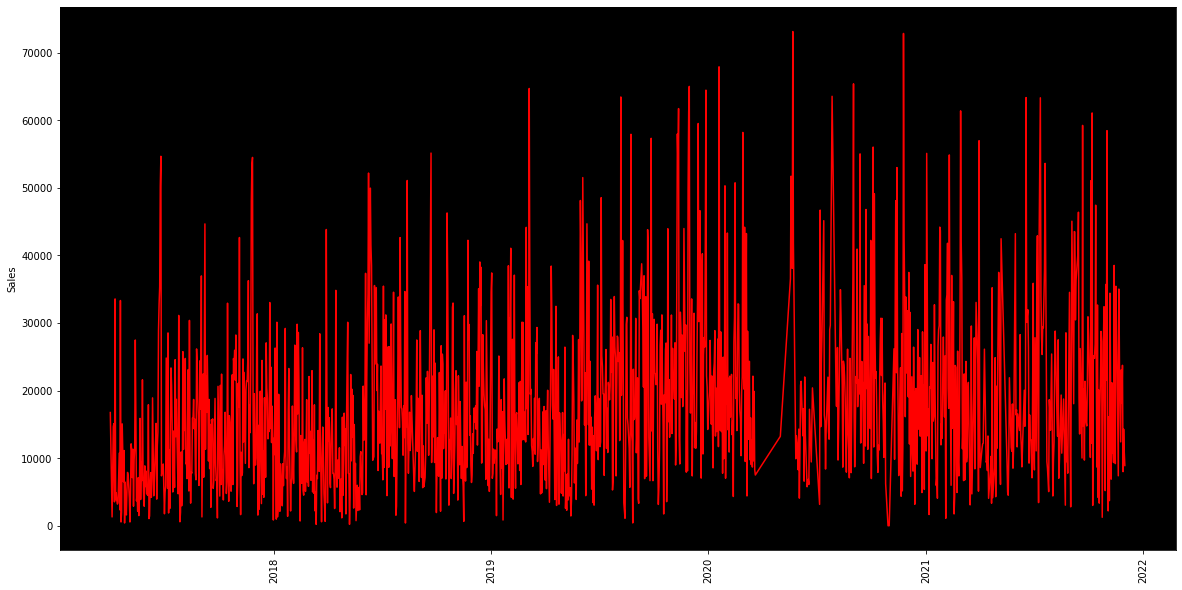

In [9]:
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['Sales'], color = 'red')
plt.xticks(rotation = 'vertical')
plt.ylabel("Sales")
plt.show()

In [24]:
df_2017 = df['20180101':'20181230']

In [25]:
df_2017

,Sales,Average Discount,Year,Month,Day,Week Day,Week End,Hijri Dates,eid ul fitr,eid ul Adha,Muharrum,Wheat Harvest,Cotton Harvest
Date,,,,,,,,,,,,,
2018-01-01,12948,20,2018,1,1,1,0,412,0,0,0,0,0
2018-01-02,10530,0,2018,1,2,1,0,413,0,0,0,0,0
2018-01-03,26292,20,2018,1,3,1,0,414,0,0,0,0,0
2018-01-04,14784,20,2018,1,4,1,0,415,0,0,0,0,0
2018-01-05,975,0,2018,1,5,1,0,416,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-26,15676,15,2018,12,26,1,0,419,0,0,0,0,0
2018-12-27,5941,15,2018,12,27,1,0,420,0,0,0,0,0
2018-12-28,12797,15,2018,12,28,1,0,421,0,0,0,0,0


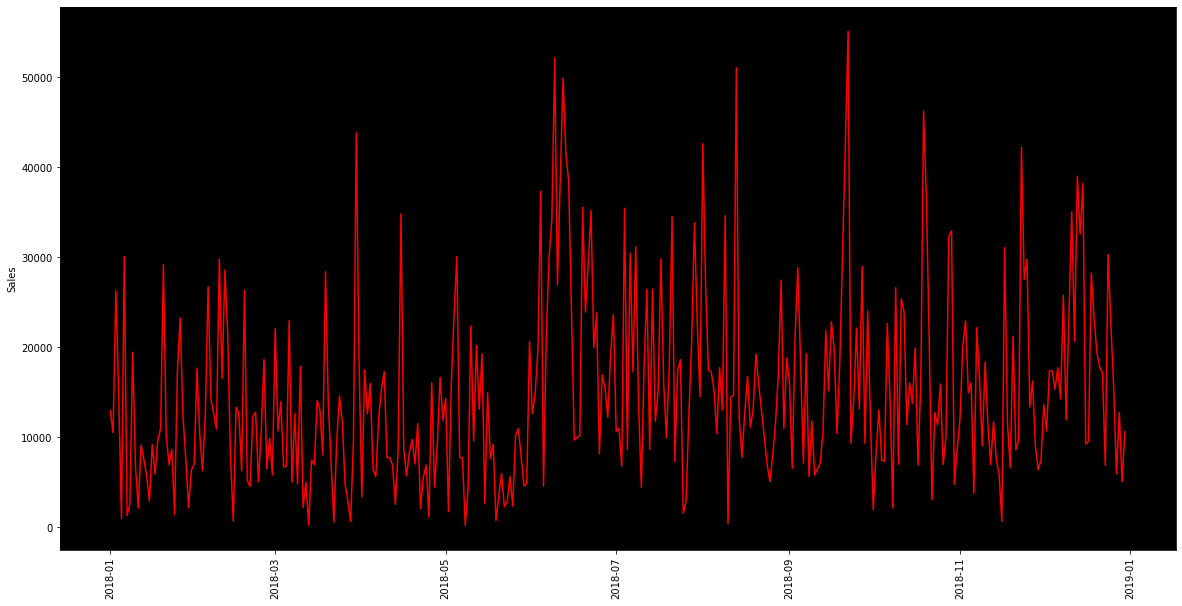

In [26]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation = 'vertical')
plt.ylabel("Sales")
plt.plot(df_2017.index, df_2017['Sales'], color = 'red')
plt.show()

In [5]:
df_weekly = df.resample('W').agg({'Sales':'sum', 'Average Discount': 'mean', 'eid ul fitr':'mean', 'eid ul Adha':'mean', 'Wheat Harvest':'mean', 'Cotton Harvest':'mean'})


In [6]:
for c in gregorian_months:
    df_weekly[c] = 0
for c in islamic_months:
    df_weekly[c] = 0


In [7]:
for index, row in df_weekly.iterrows():
    gregorian_month_name = gregorian_months[index.month-1]

    islamic_month_index = convert.Gregorian.fromdate(index).to_hijri().month - 1
    islamic_month_name = islamic_months[islamic_month_index - 1]
    
    df_weekly.at[index, gregorian_month_name] = 1
    df_weekly.at[index, islamic_month_name] = 1

In [8]:
df_weekly['Week 1'] =0
df_weekly['Week 2'] =0
df_weekly['Week 3'] =0
df_weekly['Week 4'] =0
df_weekly['Week 5'] =0

In [9]:
for index, row in df_weekly.iterrows():
    week_number = index.isocalendar()[1] - index.replace(day=1).isocalendar()[1] + 1
    print(week_number)
    if week_number == 1:
        df_weekly.at[index, 'Week 1'] = 1
        
    elif week_number == 2:
        df_weekly.at[index, 'Week 2'] = 1

    elif week_number == 3:
        df_weekly.at[index, 'Week 3'] = 1
        
    elif week_number == 4:
        df_weekly.at[index,'Week 4'] = 1
        
    elif week_number == 5:
        df_weekly.at[index, 'Week 5'] = 1
        

1
2
3
4
5
1
2
3
4
1
2
3
4
1
2
3
4
5
1
2
3
4
1
2
3
4
1
2
3
4
5
1
2
3
4
1
2
3
4
5
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
5
1
2
3
4
1
2
3
4
1
2
3
4
5
1
2
3
4
1
2
3
4
5
1
2
3
4
1
2
3
4
1
2
3
4
5
1
2
3
4
1
2
3
4
1
2
3
4
5
1
2
3
4
1
2
3
4
1
2
3
4
5
1
2
3
4
1
2
3
4
1
2
3
4
5
1
2
3
4
1
2
3
4
1
2
3
4
5
1
2
3
4
1
2
3
4
1
2
3
4
5
1
2
3
4
1
2
3
4
5
1
2
3
4
1
2
3
4
1
2
3
4
5
1
2
3
4
1
2
3
4
1
2
3
4
5
1
2
3
4
1
-51
-50
-49
-48
1
2
3
4
1
2
3
4
1
2
3
4
1
2
3
4
5
1
2
3
4
1
2
3
4
1
2
3
4
5
1
2
3
4
1
2
3
4
5
1
2
3
4
1


In [10]:
df_weekly

,Sales,Average Discount,eid ul fitr,eid ul Adha,Wheat Harvest,Cotton Harvest,January,February,March,April,...,Shaban,Ramadan,Shawal,Dhu al Qa'dah,Dhu al Hijah,Week 1,Week 2,Week 3,Week 4,Week 5
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-02,28088,10.500000,0.0,0.0,1.0,0.000000,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2017-04-09,73471,0.000000,0.0,0.0,1.0,0.000000,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2017-04-16,29785,0.000000,0.0,0.0,1.0,0.000000,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2017-04-23,59785,0.000000,0.0,0.0,1.0,0.000000,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2017-04-30,35325,0.000000,0.0,0.0,1.0,0.000000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-07,148194,20.000000,0.0,0.0,0.0,1.000000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2021-11-14,119808,18.571429,0.0,0.0,0.0,1.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2021-11-21,155453,21.428571,0.0,0.0,0.0,1.000000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
df_weekly['Year'] = df_weekly.index.year

In [12]:
# df_weekly.to_csv('multi_feature_sales_data_weekly.csv')

In [17]:
df_monthly = df.resample('M').agg({'Sales':'sum', 'Average Discount': 'mean', 'eid ul fitr':'mean', 'eid ul Adha':'mean', 'Wheat Harvest':'mean', 'Cotton Harvest':'mean'})


In [18]:
for c in gregorian_months:
    df_monthly[c] = 0
for c in islamic_months:
    df_monthly[c] = 0


In [19]:
for index, row in df_monthly.iterrows():
    gregorian_month_name = gregorian_months[index.month-1]

    islamic_month_index = convert.Gregorian.fromdate(index).to_hijri().month - 1
    islamic_month_name = islamic_months[islamic_month_index - 1]
    
    df_monthly.at[index, gregorian_month_name] = 1
    df_monthly.at[index, islamic_month_name] = 1

In [20]:
df_monthly

,Sales,Average Discount,eid ul fitr,eid ul Adha,Wheat Harvest,Cotton Harvest,January,February,March,April,...,Rabi al Awwal,Rabi ath Thani,Jamada al Ula,Jumada ath Thaniyah,Rajab,Shaban,Ramadan,Shawal,Dhu al Qa'dah,Dhu al Hijah
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-30,226454,0.777778,0.000000,0.000000,1.0,0.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2017-05-31,244123,3.333333,0.000000,0.000000,1.0,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2017-06-30,396351,4.285714,0.535714,0.000000,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-07-31,354488,2.258065,0.000000,0.000000,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2017-08-31,466316,2.258065,0.000000,0.161290,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2017-09-30,422322,7.142857,0.000000,0.071429,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2017-10-31,420658,3.333333,0.000000,0.000000,0.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-11-30,588719,17.482759,0.000000,0.000000,0.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-31,452361,15.129032,0.000000,0.000000,0.0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [21]:
df_monthly.to_csv('multi_feature_sales_data_monthly.csv')